# Ford GoBike System
## by Islam Saeed

## Preliminary Wrangling

This document explores a dataset including time, stations, and users' attributes for 183,412 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time
import datetime
import calendar

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Import Ford GoBike csv file into jupyter notebook
gbdf = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
gbdf

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [4]:
print(gbdf.shape)
print(gbdf.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

### What is the structure of your dataset?

> > This dataset includes 18312 trips with 15 features and just for Feb 2019 

| Variable Name          | Definition                 |
|------------------------|----------------------------|
|duration_sec            |    int64                   |
|start_time              |   object                   |
|end_time                |   object                   |
|start_station_id        |  float64                   |
|start_station_name      |   object                   |
|start_station_latitude  |  float64                   |
|start_station_longitude |  float64                   |
|end_station_id          |  float64                   |
|end_station_name        |   object                   |
|end_station_latitude    |  float64                   |
|end_station_longitude   |  float64                   |
|bike_id                 |    int64                   |
|user_type               |   object                   |
|member_birth_year       |  float64                   |
|member_gender           |   object                   |
|bike_share_for_all_trip |   object                   |



### What is/are the main feature(s) of interest in your dataset?

> my main interest is  to explore the data and extract the following:
* the time is a major point of exploration in this dataset as we can explore the favourable times for user and how long they use the service. also we can work on categorizing users' ages to which age group has the most usage  
* The Stations and their places can identify the users points of interest.
* The user types is one of the most important key points to explore

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Expecting that most of the data would serve in a compatable way supporting the features of interest.

* Setting up the data

In [5]:
#Convert time variables from object to datetime
gbdf['start_time'] = pd.to_datetime(gbdf['start_time'])
gbdf['start_month_num'] = gbdf['start_time'].apply(lambda time: time.month)
gbdf['start_time_hour_minute']=gbdf['start_time'].map(lambda x: x.strftime('%H-%m'))
gbdf['start_time_hour']=gbdf['start_time'].dt.hour
gbdf['start_time_weekday_abbr']=gbdf['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
gbdf['end_time']=pd.to_datetime(gbdf['end_time'])
gbdf['end_month_num'] = gbdf['end_time'].apply(lambda time: time.month)
gbdf['end_time_hour_minute']=gbdf['end_time'].map(lambda x: x.strftime('%H-%m'))
gbdf['end_time_hour']=gbdf['end_time'].dt.hour
gbdf['duration_min'] = gbdf['duration_sec']/60
gbdf['end_time_weekday_abbr']=gbdf['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
gbdf['start_time_year_month_renamed'] = gbdf['start_time'].dt.strftime('%y' + '-' + '%m')

In [37]:
gbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   duration_sec                   183412 non-null  int64         
 1   start_time                     183412 non-null  datetime64[ns]
 2   end_time                       183412 non-null  datetime64[ns]
 3   start_station_id               183215 non-null  float64       
 4   start_station_name             183215 non-null  object        
 5   start_station_latitude         183412 non-null  float64       
 6   start_station_longitude        183412 non-null  float64       
 7   end_station_id                 183215 non-null  float64       
 8   end_station_name               183215 non-null  object        
 9   end_station_latitude           183412 non-null  float64       
 10  end_station_longitude          183412 non-null  float64       
 11  

In [6]:
# creating age
gbdf['age'] = gbdf['member_birth_year'].apply(lambda x: 2019 - x)


In [7]:
#Day of the week
gbdf['start_weekday_num'] = gbdf['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
gbdf['start_weekday_char'] = gbdf['start_weekday_num'].map(dmap)
gbdf['end_weekday_num'] = gbdf['end_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
gbdf['end_weekday_char'] = gbdf['end_weekday_num'].map(dmap)


In [8]:
# convert weekday into ordered categorical types
ordinal_var_dict = {'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],'end_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    gbdf[var] = gbdf[var].astype(ordered_var)

In [9]:
# Exploring the top 5 Start Staions
print(len(gbdf['start_station_name'].value_counts()))
gbdf['start_station_name'].value_counts()

329


Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [10]:
#locating top 5 start stations
locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)']
df_top5s = gbdf.loc[gbdf['start_station_name'].isin(locs)]

In [11]:
# Exploring the top 5 End Staions
print(len(gbdf['end_station_name'].value_counts()))
gbdf['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [12]:
#locating top 5 end stations
locs1 = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','San Francisco Ferry Building (Harry Bridges Plaza)','Powell St BART Station (Market St at 4th St)']
df_top5e = gbdf.loc[gbdf['end_station_name'].isin(locs1)]

In [38]:
df_top5s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16155 entries, 0 to 183408
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   duration_sec                   16155 non-null  int64         
 1   start_time                     16155 non-null  datetime64[ns]
 2   end_time                       16155 non-null  datetime64[ns]
 3   start_station_id               16155 non-null  float64       
 4   start_station_name             16155 non-null  object        
 5   start_station_latitude         16155 non-null  float64       
 6   start_station_longitude        16155 non-null  float64       
 7   end_station_id                 16155 non-null  float64       
 8   end_station_name               16155 non-null  object        
 9   end_station_latitude           16155 non-null  float64       
 10  end_station_longitude          16155 non-null  float64       
 11  bike_id       

In [13]:
# Exploring the top 5 Start and end Stations combination to see how frequent a trip is repeated
gbdf['sct']=gbdf['start_station_name']+' to '+gbdf['end_station_name']
gbdf['sct'].dropna()
gbdf['sct'].value_counts()  

Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)               337
San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St    314
Grand Ave at Perkins St to 19th Street BART Station                                    310
The Embarcadero at Sansome St to Steuart St at Market St                               285
19th Street BART Station to Grand Ave at Perkins St                                    284
                                                                                      ... 
Haste St at Telegraph Ave to Telegraph Ave at 27th St                                    1
45th St at MLK Jr Way to 47th St at San Pablo Ave                                        1
Esprit Park to Turk St at Fillmore St                                                    1
Broadway at Coronado Ave to 45th St at Manila                                            1
8th St at Ringold St to S Van Ness Ave at Market St                                      1

In [14]:
#locating top 5 repeated trips
locs2 = ['Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)','San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St','Grand Ave at Perkins St to 19th Street BART Station','The Embarcadero at Sansome St to Steuart St at Market St','19th Street BART Station to Grand Ave at Perkins St']
df_top5c = gbdf.loc[gbdf['sct'].isin(locs2)]
df_top5c.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_hour,duration_min,end_time_weekday_abbr,start_time_year_month_renamed,age,start_weekday_num,start_weekday_char,end_weekday_num,end_weekday_char,sct
163,4998,2019-02-28 21:22:51.632,2019-02-28 22:46:10.114,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,16.0,Steuart St at Market St,37.794130,...,22,83.300000,Thu,19-02,32.0,3,Thu,3,Thu,The Embarcadero at Sansome St to Steuart St at...
914,462,2019-02-28 20:06:33.955,2019-02-28 20:14:16.012,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,20,7.700000,Thu,19-02,45.0,3,Thu,3,Thu,Berry St at 4th St to San Francisco Ferry Buil...
1342,241,2019-02-28 19:21:22.029,2019-02-28 19:25:23.730,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,...,19,4.016667,Thu,19-02,26.0,3,Thu,3,Thu,19th Street BART Station to Grand Ave at Perki...
1367,476,2019-02-28 19:15:42.607,2019-02-28 19:23:39.185,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,19,7.933333,Thu,19-02,50.0,3,Thu,3,Thu,Berry St at 4th St to San Francisco Ferry Buil...
1400,288,2019-02-28 19:16:05.759,2019-02-28 19:20:54.061,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,...,19,4.800000,Thu,19-02,30.0,3,Thu,3,Thu,19th Street BART Station to Grand Ave at Perki...


In [15]:
# After subsetting top 5 start stations with the most trip
st_stat_counts = df_top5s['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

In [16]:
# After subsetting top 5 end stations with the most trip
st_stat_counts = df_top5e['end_station_name'].value_counts()
st_stat_order = st_stat_counts.index

In [17]:
# After subsetting top 5 start to end stations with the most trip
st_stat_counts = df_top5c['sct'].value_counts()
st_stat_order = st_stat_counts.index

## Univariate Exploration

> In this section, investigate distributions of individual variables using three different data sets to explore more of the dataset

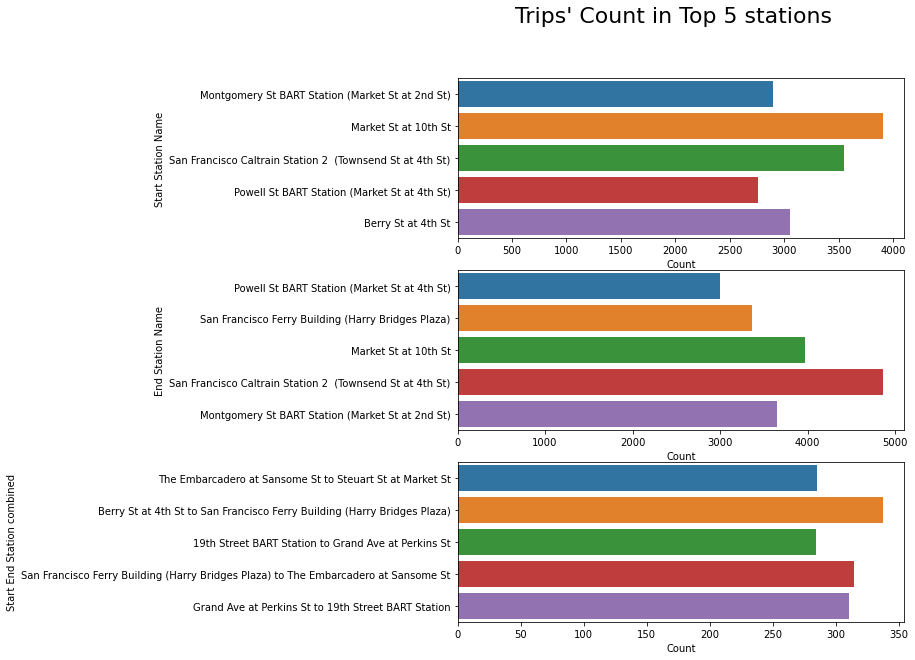

In [18]:
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top5s, y = 'start_station_name', ax = ax[0])
sb.countplot(data = df_top5e, y = 'end_station_name', ax = ax[1])
sb.countplot(data = df_top5c, y = 'sct', ax = ax[2])
ax[0].set_ylabel('Start Station Name')
ax[0].set_xlabel('Count')
ax[1].set_ylabel('End Station Name')
ax[1].set_xlabel('Count')
ax[2].set_ylabel('Start End Station combined')
ax[2].set_xlabel('Count')
fig.suptitle('Trips\' Count in Top 5 stations',fontsize=22);

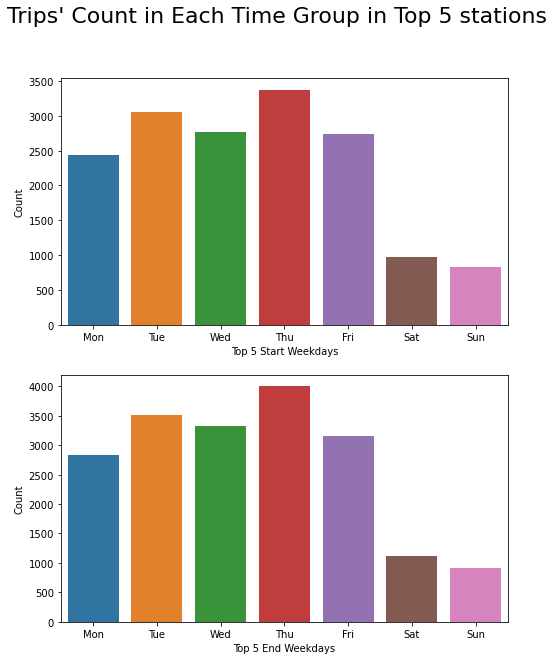

In [19]:
#Exploring top 5 
fig, ax = plt.subplots(nrows=2, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top5s, x = 'start_weekday_char', ax = ax[0])
sb.countplot(data = df_top5e, x = 'end_weekday_char', ax = ax[1])
ax[0].set_xlabel('Top 5 Start Weekdays')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Top 5 End Weekdays')
ax[1].set_ylabel('Count')
fig.suptitle('Trips\' Count in each weekday in Top 5 stations',fontsize=22);

#### A slight differnece in the counts is noted between Top 5 Start stations and End Stations

In [20]:
df_top5c

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_hour,duration_min,end_time_weekday_abbr,start_time_year_month_renamed,age,start_weekday_num,start_weekday_char,end_weekday_num,end_weekday_char,sct
163,4998,2019-02-28 21:22:51.632,2019-02-28 22:46:10.114,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,16.0,Steuart St at Market St,37.794130,...,22,83.300000,Thu,19-02,32.0,3,Thu,3,Thu,The Embarcadero at Sansome St to Steuart St at...
914,462,2019-02-28 20:06:33.955,2019-02-28 20:14:16.012,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,20,7.700000,Thu,19-02,45.0,3,Thu,3,Thu,Berry St at 4th St to San Francisco Ferry Buil...
1342,241,2019-02-28 19:21:22.029,2019-02-28 19:25:23.730,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,...,19,4.016667,Thu,19-02,26.0,3,Thu,3,Thu,19th Street BART Station to Grand Ave at Perki...
1367,476,2019-02-28 19:15:42.607,2019-02-28 19:23:39.185,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,19,7.933333,Thu,19-02,50.0,3,Thu,3,Thu,Berry St at 4th St to San Francisco Ferry Buil...
1400,288,2019-02-28 19:16:05.759,2019-02-28 19:20:54.061,182.0,19th Street BART Station,37.809013,-122.268247,196.0,Grand Ave at Perkins St,37.808894,...,19,4.800000,Thu,19-02,30.0,3,Thu,3,Thu,19th Street BART Station to Grand Ave at Perki...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183092,281,2019-02-01 07:10:48.323,2019-02-01 07:15:29.455,196.0,Grand Ave at Perkins St,37.808894,-122.256460,182.0,19th Street BART Station,37.809013,...,7,4.683333,Fri,19-02,30.0,4,Fri,4,Fri,Grand Ave at Perkins St to 19th Street BART St...
183096,376,2019-02-01 07:08:12.092,2019-02-01 07:14:28.838,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,7,6.266667,Fri,19-02,56.0,4,Fri,4,Fri,San Francisco Ferry Building (Harry Bridges Pl...
183127,696,2019-02-01 06:52:58.813,2019-02-01 07:04:35.304,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,7,11.600000,Fri,19-02,31.0,4,Fri,4,Fri,Berry St at 4th St to San Francisco Ferry Buil...
183148,395,2019-02-01 06:53:22.285,2019-02-01 06:59:57.987,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,...,6,6.583333,Fri,19-02,55.0,4,Fri,4,Fri,San Francisco Ferry Building (Harry Bridges Pl...


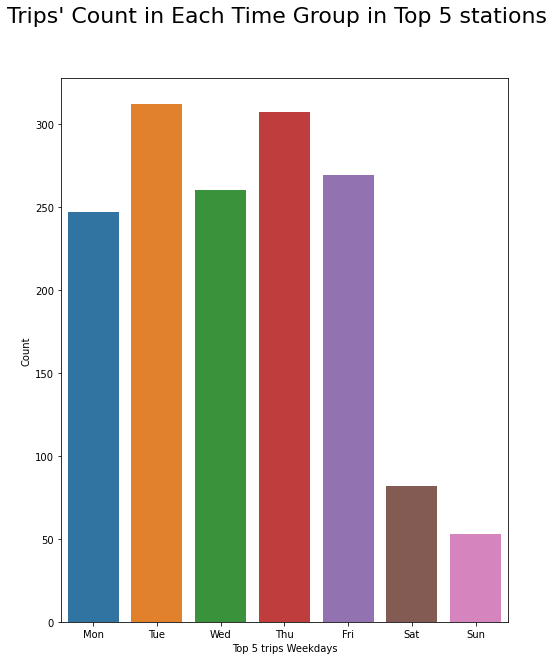

In [21]:
#Exploring top 5 trips weekdays
fig, ax = plt.subplots( figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top5c, x = 'start_weekday_char')
ax.set_xlabel('Top 5 trips Weekdays')
ax.set_ylabel('Count')
fig.suptitle('Trips\' Count in Each Time Group in Top 5 stations',fontsize=22);

#### from this point we will neglect the combined stations dataset due to length of the data

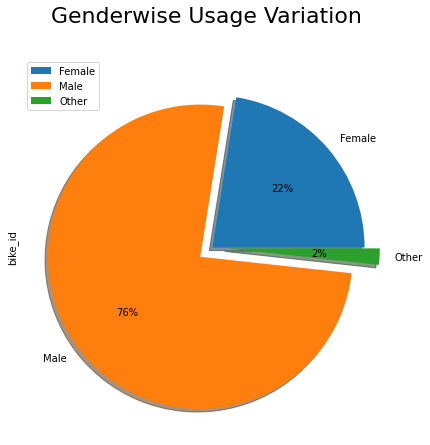

In [22]:
# investigating genderwise usage from Start Station data set
sgdf = pd.DataFrame(df_top5s.groupby(['member_gender']).count()['bike_id'])
explode = (0, 0.1, 0.1) 
sgdf.plot(kind = 'pie', figsize =(7,7), autopct='%1.0f%%', subplots = True, explode = explode, shadow=True, startangle=0)

plt.suptitle('Genderwise Usage Variation',fontsize=22)
plt.show()

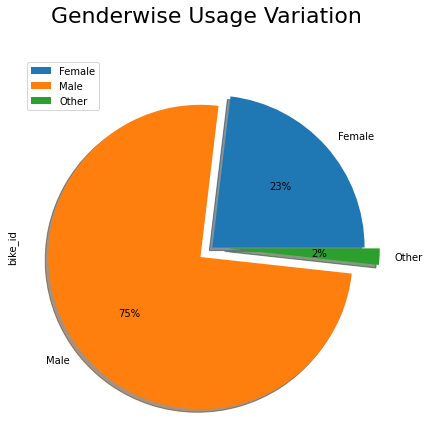

In [23]:
# investigating genderwise usage from Start Station data set
sgdf = pd.DataFrame(df_top5e.groupby(['member_gender']).count()['bike_id'])
explode = (0, 0.1, 0.1) 
sgdf.plot(kind = 'pie', figsize =(7,7), autopct='%1.0f%%', subplots = True, explode = explode, shadow=True, startangle=0)

plt.suptitle('Genderwise Usage Variation',fontsize=22)
plt.show()

#### from this point we will neglect End Station Data set as their is a slight difference in data and to avoid dupllication

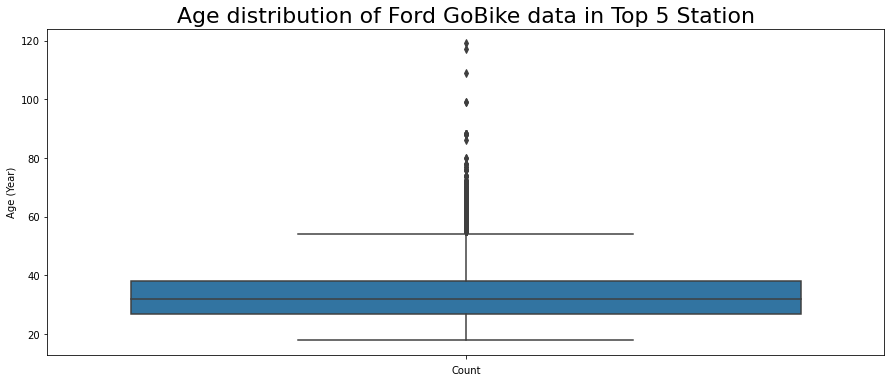

In [24]:
# Let's investigate in the age distribution
plt.figure(figsize=(15,6))
sb.boxplot(data=df_top5s, y='age')
plt.ylabel('Age (Year)')
plt.xlabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 5 Station',fontsize=22);

#### Let's have a clear view

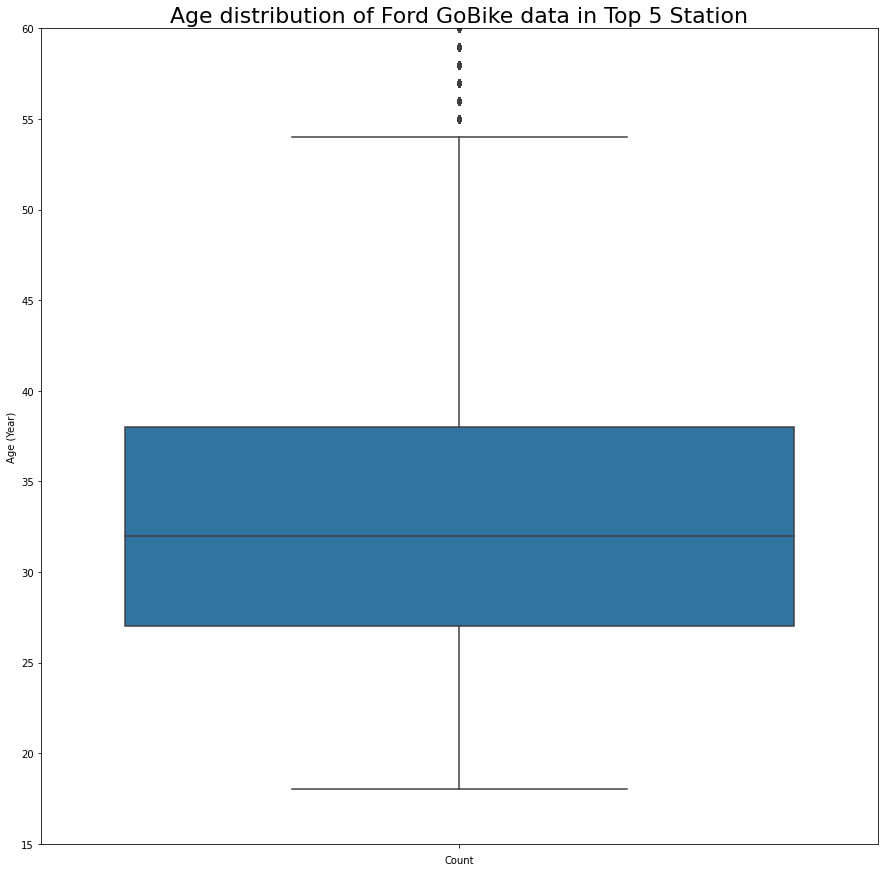

In [25]:
plt.figure(figsize=(15,15))
ax = sb.boxplot(data=df_top5s, y='age')
ax.set_ylim([15, 60])
plt.ylabel('Age (Year)')
plt.xlabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 5 Station',fontsize=22);

##### From this point of view we can clarify the most of Users are between 28 - 38 years

### Bikeshare trend? I believe 

In [26]:
bs=df_top5s[df_top5s['bike_share_for_all_trip']=='Yes'].groupby('start_time_hour').agg({'bike_id':'count'})
bs

,bike_id
start_time_hour,
0,1
1,1
2,4
3,2
6,28
7,32
8,20
9,34
10,33


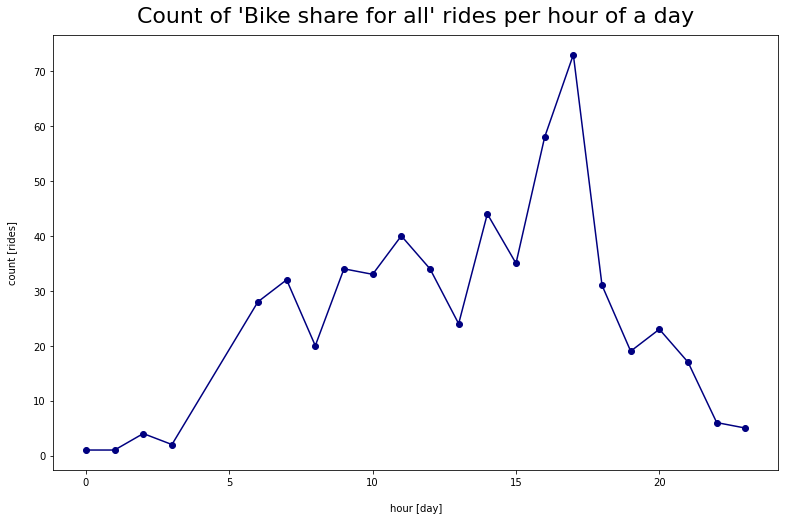

In [27]:
df_top5s[df_top5s['bike_share_for_all_trip']=='Yes'].groupby('start_time_hour').agg({'bike_id':'count'}).plot(style='-o', figsize=(13,8), color='navy', legend=False)
plt.title("Count of 'Bike share for all' rides per hour of a day", fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('count [rides]', labelpad=16);

#### Bikeshare is not trending as we can see the low counts from the above that doesen't exceed the 600 count out of 16000 Entry

In [28]:
#saving the dataframe in CSV for easier approach
df_top5s.to_csv("Start-fordgobike-tripdata-clean.csv", index=False)


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After extrating three dataframes one for the most used Start station , end station and most common combitaiton :

`most common combination`
* counts were very small (1530 entry)that we counldn't verify our analysis

`Start and end dfs`
* we found that Weekdays are higher in trip counts
* Most of the users are males 76%
* Most of users are between 28-38 years old
* Customers have a big avg duration in trips
* bikeshare is also a point of look for but due to the low counts it disqulifies being a trend

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Working on the data we started specifing the some filters to extract our data by finding the top 5 Stations that the users go for and tidy it in to a separate dataframe to conclude the most repeatitive values to explore this current dataset.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Who makes more trips customers or subscribers? it is a challenging question but lets find out which user type has a higher trip duration avg

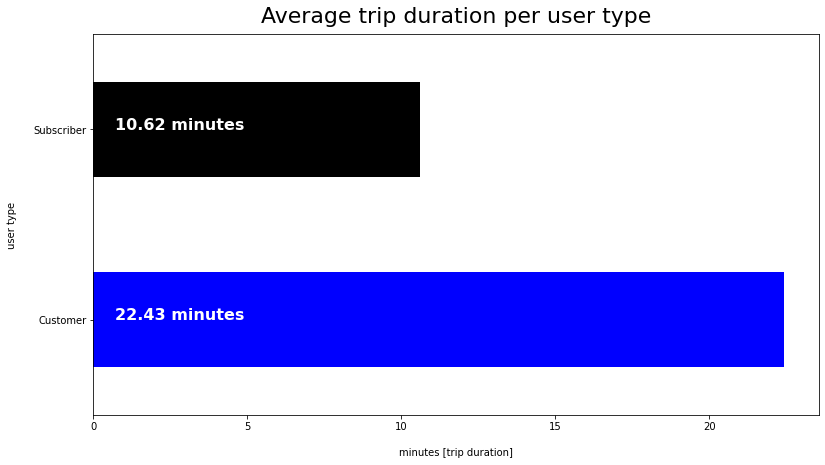

In [67]:
new_color=['blue', 'black']
dmput= df_top5s.groupby('user_type')['duration_min'].mean()
ax = df_top5s.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=22, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16);
for i,j in enumerate(dmput):
    ax.text(.7,i,str(round(j,2))+' minutes', weight='bold', ha='left', fontsize=16, color="white")


In [59]:
dmput.head()

user_type
Customer      22.427664
Subscriber    10.617123
Name: duration_min, dtype: float64

#### from the above we can deduce that customers have a larger trip average duration

#### After finding out the avg of the durations for user we can have a deeper look by focusing on durations in each of the Tops 5 Stations

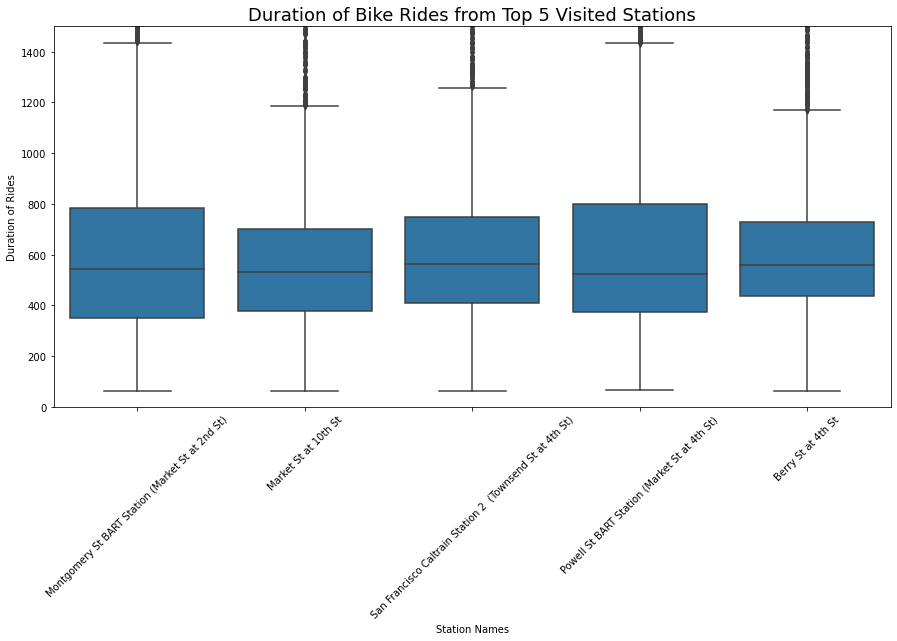

In [31]:
#Visualizing the data in a boxplot
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,7))
sb.boxplot(data = df_top5s, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 1500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names')
plt.ylabel('Duration of Rides');

m

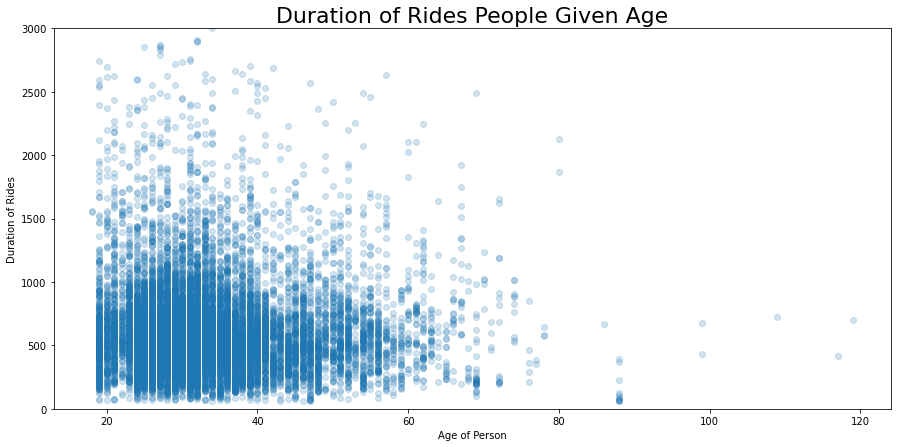

In [73]:
plt.figure(figsize = (15, 7))
plt.scatter(data = df_top5s, x = 'age', y = 'duration_sec', alpha = 0.2)
plt.title('Duration of Rides People Given Age', fontsize = 22)
axes = plt.gca()
axes.set_ylim([0,3000])
plt.xlabel('Age of Person')
plt.ylabel('Duration of Rides');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the previous point we found multiple relations:

* Age-durtaion relation and how the age of the user affect the duration of usage
* User type-duration relation and that most of the users are customers
* Top 5 Start Stations - Duration as we found that the mean of most trips in the top 5 are around 600 secs

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was multiple unapproached relations like Gender-user type relation,age distribution among user types, etc 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

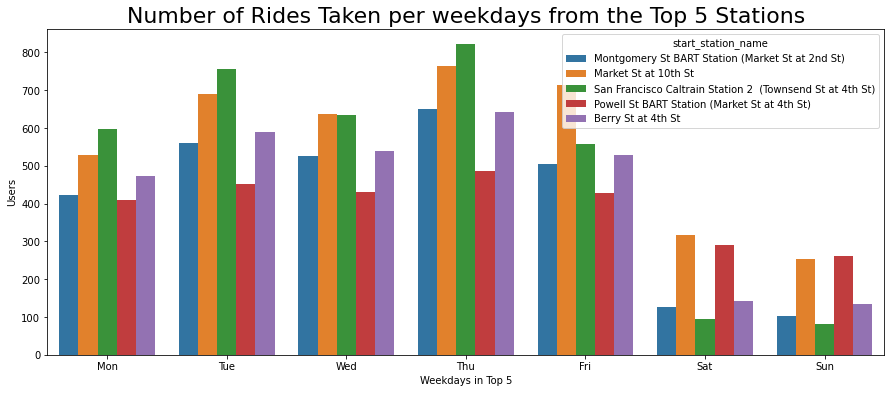

In [75]:
plt.figure(figsize = (15,6))
sb.countplot(data=df_top5s, x='start_weekday_char', hue='start_station_name')
plt.title('Number of Rides Taken per weekdays from the Top 5 Stations', fontsize = 22)
plt.xlabel('Weekdays in Top 5')
plt.ylabel('Users')
plt.show()
 

#### Lets get a deeper investigation in trip Start time from the Top 5 Start Stations

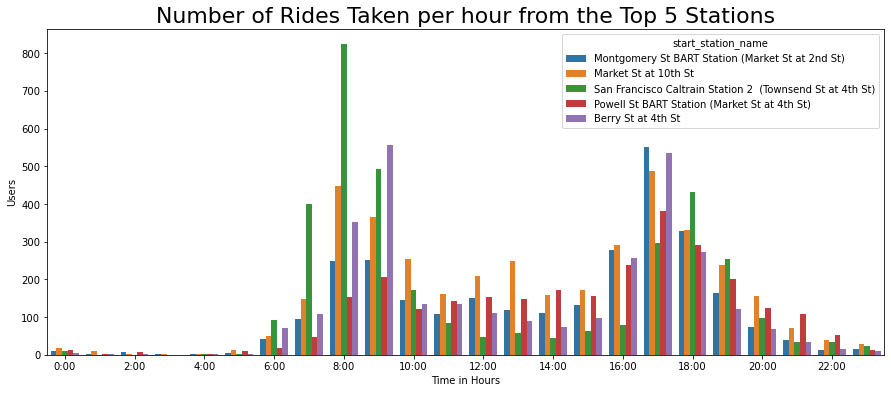

In [76]:
plt.figure(figsize = (15,6))
sb.countplot(data=df_top5s, x='start_time_hour', hue='start_station_name')
plt.title('Number of Rides Taken per hour from the Top 5 Stations', fontsize = 22)
x_tick= np.arange(0,24,2)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.show()

#### let's get more info about the time done by user in the highest age range

In [34]:
subscriber_hour_df = df_top5s[(df_top5s['age']>=28) & (df_top5s['age']<38) 
                              &(df_top5s['start_time_hour']>5)&(df_top5s['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()


subscriber_hour_df['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

subscriber_hour_df['count_perc'] = subscriber_hour_df['count'].apply(lambda x: (x/subscriber_hour_df['count'].sum())*100) 

subscriber_hour_df['rank'] = subscriber_hour_df['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_df_pivoted = subscriber_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

In [35]:
customer_hour_df = df_top5s[(df_top5s['age']>=20) & (df_top5s['age']<40) 
                              &(df_top5s['start_time_hour']>5)&(df_top5s['user_type']=='Customer') 
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

customer_hour_df['start_time_weekday_abbr'] = pd.Categorical(customer_hour_df['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

customer_hour_df['count_perc'] = customer_hour_df['count'].apply(lambda x: (x/customer_hour_df['count'].sum())*100) #male

customer_hour_df['rank'] = customer_hour_df['count_perc'].rank(ascending=False).astype(int)

customer_hour_df_pivoted = customer_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank').dropna().astype(int)

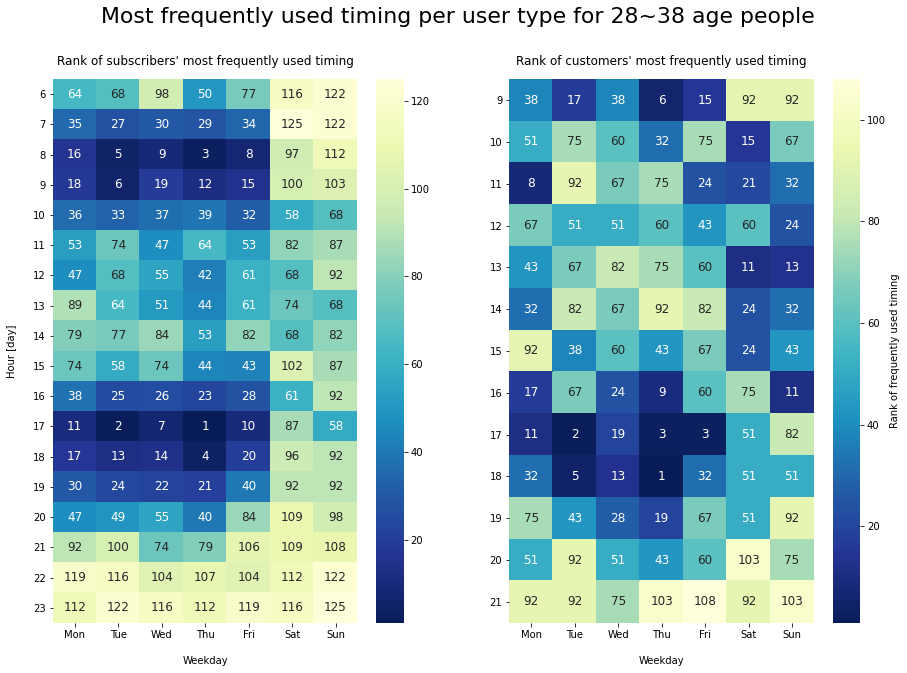

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.suptitle('Most frequently used timing per user type for 28~38 age people', fontsize=22)
sb.heatmap(subscriber_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12})
plt.title("Rank of subscribers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour [day]', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(122)
sb.heatmap(customer_hour_df_pivoted, fmt='d', annot=True, cmap='YlGnBu_r', annot_kws={"size": 12}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("Rank of customers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We started investigating more in the times of the trips so we can identify wahat is the most preferred time for users and our investigation focused three main points:

* the relation with weekdays on each station
* the relation with the most crowded hours in each station
* the relation with the most crowded hours in the age range of 28 to 38

### Were there any interesting or surprising interactions between features?

> yes while doing the investigaiton i was expecting the most of the rides will at night but from the distribution the peaks are at the early morning and late afternoon till midnight